In [1]:
from datasets import load_dataset

dataset = load_dataset("go_emotions")

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

In [3]:
# Converting the dataset to a dataframe for ease
df = pd.DataFrame(dataset["train"])
df.head()

,text,labels,id
0,My favourite food is anything I didn't have to...,[27],eebbqej
1,"Now if he does off himself, everyone will thin...",[27],ed00q6i
2,WHY THE FUCK IS BAYLESS ISOING,[2],eezlygj
3,To make her feel threatened,[14],ed7ypvh
4,Dirty Southern Wankers,[3],ed0bdzj


In [4]:
label_counts = Counter() # counts number of occurences

# Looping through all label lists and counting each label's total occurrences
for labels in df["labels"]:
    label_counts.update(labels)

In [5]:
# Mapping indices to label names
label_names = dataset["train"].features["labels"].feature.names
label_distribution = {label_names[i]: count for i, count in label_counts.items()}

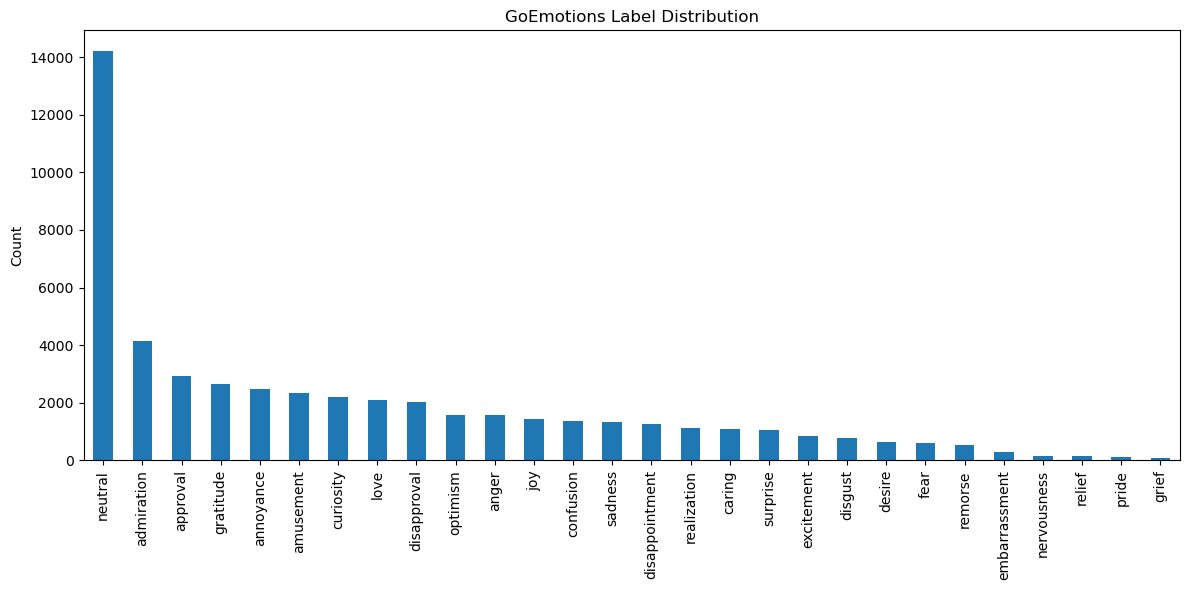

In [6]:
# Plot for the number of occurences of each emotion in the training set
plt.figure(figsize=(12, 6))
pd.Series(label_distribution).sort_values(ascending=False).plot(kind='bar')
plt.title("GoEmotions Label Distribution")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [7]:
import re

def clean_text(text):
    text = text.lower() # this makes every character in the text lower-cased
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)  # this removes links
    text = re.sub(r'[^A-Za-z0-9\s]+', '', text)  # this removes special characters
    text = re.sub(r'\s+', ' ', text).strip()  # this normalizes whitespace
    return text

df["clean_text"] = df["text"].apply(clean_text)
df.head(10)

,text,labels,id,clean_text
0,My favourite food is anything I didn't have to...,[27],eebbqej,my favourite food is anything i didnt have to ...
1,"Now if he does off himself, everyone will thin...",[27],ed00q6i,now if he does off himself everyone will think...
2,WHY THE FUCK IS BAYLESS ISOING,[2],eezlygj,why the fuck is bayless isoing
3,To make her feel threatened,[14],ed7ypvh,to make her feel threatened
4,Dirty Southern Wankers,[3],ed0bdzj,dirty southern wankers
5,OmG pEyToN iSn'T gOoD eNoUgH tO hElP uS iN tHe...,[26],edvnz26,omg peyton isnt good enough to help us in the ...
6,Yes I heard abt the f bombs! That has to be wh...,[15],ee3b6wu,yes i heard abt the f bombs that has to be why...
7,We need more boards and to create a bit more s...,"[8, 20]",ef4qmod,we need more boards and to create a bit more s...
8,Damn youtube and outrage drama is super lucrat...,[0],ed8wbdn,damn youtube and outrage drama is super lucrat...
9,It might be linked to the trust factor of your...,[27],eczgv1o,it might be linked to the trust factor of your...
